<a href="https://colab.research.google.com/github/premkumar25/Citizen-grievance-classification/blob/main/Citizen's_grevience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('train.csv')
df.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,issue.1,issue.10,issue.11,issue.12,issue.13,issue.14,issue.15,issue.16,issue.17,issue.18,issue.19,issue.2,issue.20,issue.21,issue.22,issue.23,issue.24,issue.25,issue.26,issue.3,issue.4,issue.5,issue.6,issue.7,issue.8,issue.9,itemid,judgementdate,kpdate,languageisocode,...,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-92699,28/05/2009,28/05/2009,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-184490,10/07/2018,10/07/2018,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-113810,18/10/2012,18/10/2012,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-141929,25/03/2014,25/03/2014,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-94585,01/10/2009,01/10/2009,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 328 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   appno                              object 
 1   application                        object 
 2   country.alpha2                     object 
 3   country.name                       object 
 4   decisiondate                       object 
 5   docname                            object 
 6   doctypebranch                      object 
 7   ecli                               object 
 8   introductiondate                   object 
 9   issue.0                            object 
 10  issue.1                            object 
 11  issue.10                           object 
 12  issue.11                           object 
 13  issue.12                           object 
 14  issue.13                           object 
 15  issue.14                           object 
 16  issue.15               

## Column details

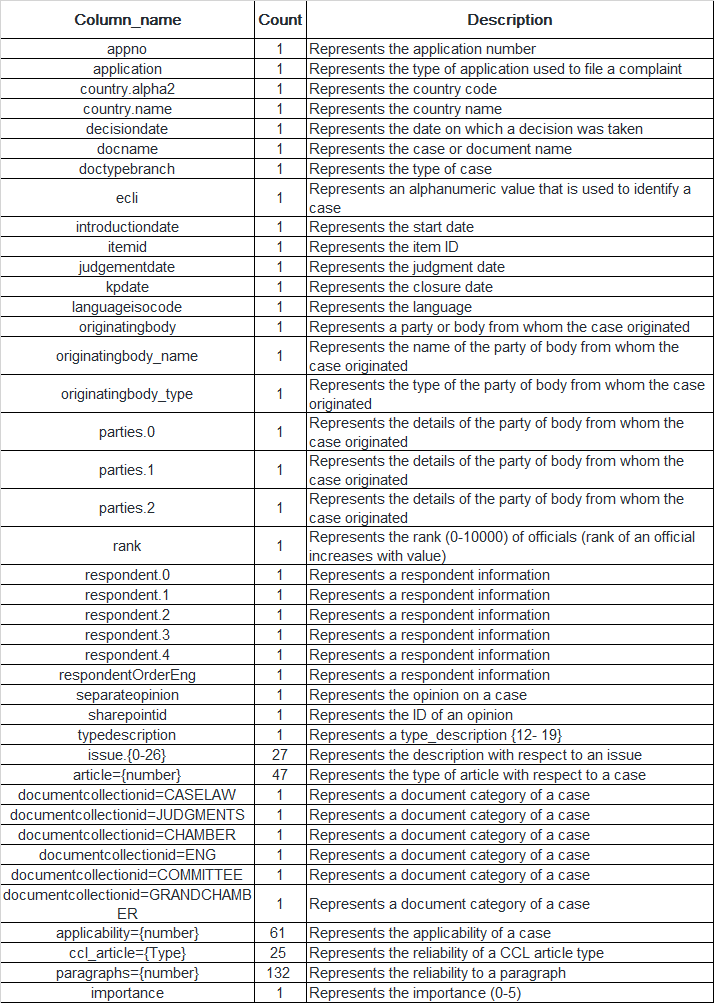

In [ ]:
df.nunique()

appno              8799
application           1
country.alpha2       46
country.name         46
decisiondate        232
                   ... 
ccl_article=p12       2
ccl_article=p4        3
ccl_article=p6        2
ccl_article=p7        3
importance            4
Length: 328, dtype: int64

In [ ]:
df.drop(['application','docname','country.alpha2','country.name','itemid','decisiondate','ecli','introductiondate','languageisocode','originatingbody_name','originatingbody_type',
         'parties.0','parties.1','parties.2','respondent.1','respondent.2','respondent.3','respondent.4','country.name'],axis=1,inplace=True)

In [ ]:
for i in range(0,27):
  df.drop('issue.'+str(i),axis=1,inplace=True)

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 284 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   appno                              object 
 1   doctypebranch                      object 
 2   itemid                             object 
 3   judgementdate                      object 
 4   kpdate                             object 
 5   originatingbody                    int64  
 6   rank                               float64
 7   respondent.0                       object 
 8   respondentOrderEng                 int64  
 9   separateopinion                    bool   
 10  sharepointid                       int64  
 11  typedescription                    int64  
 12  article=3                          int64  
 13  article=6                          int64  
 14  article=P1                         int64  
 15  article=5                          int64  
 16  article=8              

In [ ]:
df = df.set_index('appno')

In [ ]:
df['doctypebranch'].unique()

array(['CHAMBER', 'COMMITTEE', 'GRANDCHAMBER'], dtype=object)

In [ ]:
df['doctypebranch'] = df['doctypebranch'].map({'COMMITTEE':0,'CHAMBER':1,'GRANDCHAMBER':2})
df['separateopinion'] = df['separateopinion'].map({True:1,False:0})

In [ ]:
df.tail()

,doctypebranch,originatingbody,rank,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,...,respondent.0_AZE,respondent.0_BEL,respondent.0_BGR,respondent.0_BIH,respondent.0_CHE,respondent.0_CYP,respondent.0_CZE,respondent.0_DEU,respondent.0_DNK,respondent.0_ESP,respondent.0_EST,respondent.0_FIN,respondent.0_FRA,respondent.0_GBR,respondent.0_GEO,respondent.0_GRC,respondent.0_HRV,respondent.0_HUN,respondent.0_IRL,respondent.0_ISL,respondent.0_ITA,respondent.0_LIE,respondent.0_LTU,respondent.0_LVA,respondent.0_MDA,respondent.0_MKD,respondent.0_MLT,respondent.0_MNE,respondent.0_NLD,respondent.0_NOR,respondent.0_POL,respondent.0_PRT,respondent.0_ROU,respondent.0_RUS,respondent.0_SRB,respondent.0_SVK,respondent.0_SVN,respondent.0_SWE,respondent.0_TUR,respondent.0_UKR
appno,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51277/99,1,5,546.882141,11,0,433902,15,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44292/04,1,5,704.504883,47,0,354124,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6521/07,0,25,1210.224854,38,0,389461,15,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
54215/08,1,23,713.811035,18,0,346868,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13178/03,1,4,569.991821,6,0,414661,15,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in df.columns:
  if df[i].dtype == 'O':
    print(i, df[i].dtype)

judgementdate object
kpdate object
respondent.0 object


In [ ]:
df['judgementdate'] = pd.to_datetime(df['judgementdate'])
df['kpdate'] = pd.to_datetime(df['kpdate'])

In [ ]:
df.drop(['judgementdate','kpdate'],axis=1,inplace=True)

In [ ]:
for i in df.columns:
  if df[i].isnull().sum() >0:
    print(i,df[i].isnull().sum())

In [ ]:
df = pd.get_dummies(df, columns=['respondent.0'], drop_first=True)

In [ ]:
df.shape

(8878, 324)

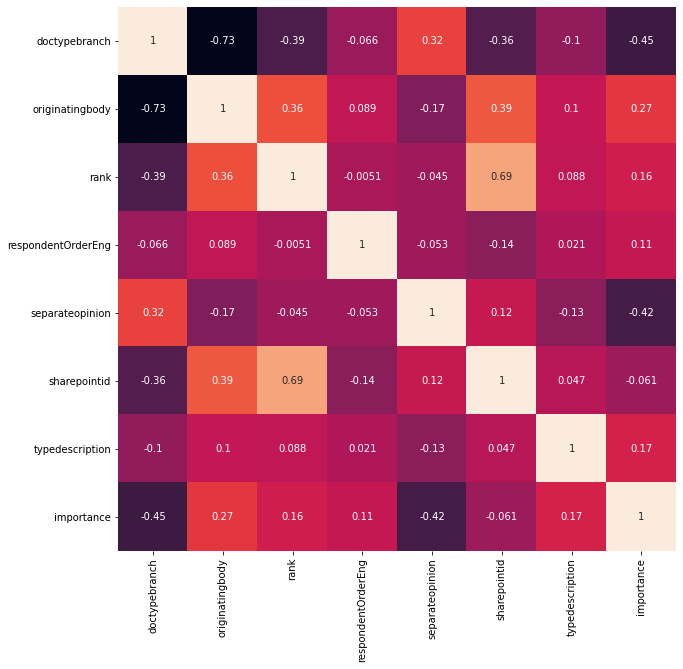

In [ ]:
cols = ['doctypebranch','originatingbody','rank','respondentOrderEng','separateopinion','sharepointid',	'typedescription','importance']
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[cols].corr(),annot=True,cbar=False,ax=ax)

In [ ]:
#df = df.drop('sharepointid',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5c16c1e10>,
      dtype=object)

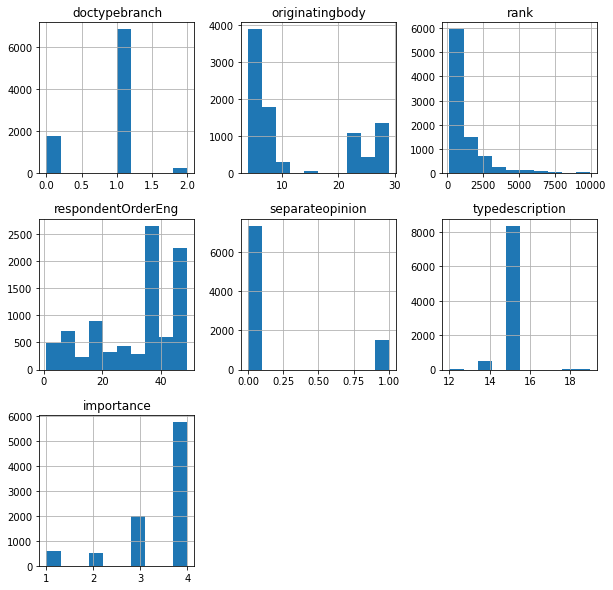

In [ ]:
newcols = ['doctypebranch','originatingbody','rank','respondentOrderEng','separateopinion','typedescription','importance']
df[newcols].hist(figsize=(10,10))

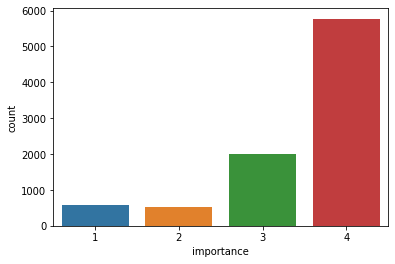

In [ ]:
sns.countplot(df['importance'])

In [ ]:
source = df.drop('importance',axis=1)
target = df['importance']

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
source, target = SMOTE().fit_resample(source, target)

In [ ]:
col = []
for i in df.columns:
  if i != 'importance':
    col.append(i)

In [ ]:
source =pd.DataFrame(source, columns=col)
source.head()

,doctypebranch,originatingbody,rank,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,...,respondent.0_BGR,respondent.0_BIH,respondent.0_CHE,respondent.0_CYP,respondent.0_CZE,respondent.0_DEU,respondent.0_DNK,respondent.0_ESP,respondent.0_EST,respondent.0_FIN,respondent.0_FRA,respondent.0_GBR,respondent.0_GEO,respondent.0_GRC,respondent.0_HRV,respondent.0_HUN,respondent.0_IRL,respondent.0_ISL,respondent.0_ITA,respondent.0_LIE,respondent.0_LTU,respondent.0_LUX,respondent.0_LVA,respondent.0_MDA,respondent.0_MKD,respondent.0_MLT,respondent.0_MNE,respondent.0_NLD,respondent.0_NOR,respondent.0_POL,respondent.0_PRT,respondent.0_ROU,respondent.0_RUS,respondent.0_SMR,respondent.0_SRB,respondent.0_SVK,respondent.0_SVN,respondent.0_SWE,respondent.0_TUR,respondent.0_UKR
0,1.0,4.0,685.417419,38.0,0.0,349418.0,15.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,26.0,2641.901855,47.0,0.0,476616.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,23.0,942.213440,43.0,1.0,373194.0,15.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,5.0,1121.770142,46.0,1.0,392525.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,4.0,704.821594,38.0,0.0,423100.0,15.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


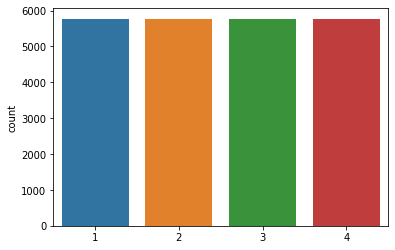

In [ ]:
sns.countplot(target)

In [ ]:
source.shape

(23096, 323)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(source,target, test_size=0.3)

In [ ]:
#clf = [KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(), XGBClassifier()]

def score_calc():
  for i in range (len(clf)):
    score = cross_val_score(clf[i],source,target,cv=10)
    print('Score of model', i,'is ',np.mean(score)*100)
#score_calc()

Score of model 0 is  70.13960409112607
Score of model 1 is  87.41839076957454
Score of model 2 is  65.62292422072579
Score of model 3 is  87.60976873152748


In [ ]:
#parameters = {'bootstrap':[True, False],
#              'n_estimators':[100,150,200,300,500,700,900,1000,1100],
#              'max_features':['auto', 'sqrt'],
#              'min_samples_split':[2, 5, 10],
#              'min_samples_leaf':[1, 2, 4]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#estimator = RandomizedSearchCV(RandomForestClassifier(),parameters,cv=10,scoring='accuracy')

In [ ]:
#model = estimator.fit(source,target)
#model.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#classifier = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
#                       criterion='gini', max_depth=None, max_features='auto',
#                       max_leaf_nodes=None, max_samples=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=5,
#                       min_weight_fraction_leaf=0.0, n_estimators=1000,
#                       n_jobs=None, oob_score=False, random_state=None,
#                       verbose=0, warm_start=False)
#score = cross_val_score(classifier, source, target,cv=10)
#score.mean()

0.8723814710990585

In [ ]:
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#print(accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))               ### Old accuracy scre

0.8828828828828829
[[  81    7   74   11]
 [   8   56   57    9]
 [   8   20  501   77]
 [   1    1   39 1714]]


In [ ]:
xgbparam = {'max_depth': [2,3,5,10,15], 
         'n_estimators':[100, 150,200,500,900], 
          'booster':['gbtree','gblinear'],
          'learning_rate':[0.05,0.1,0.15,0.20],
         'min_child_weight':[1,2,3,4],
         'base_score':[0.25,0.5,0.75,1]}

In [ ]:
xgbestimator = RandomizedSearchCV(XGBClassifier(),xgbparam,scoring='accuracy',cv=10)

In [ ]:
xgbmodel = xgbestimator.fit(source,target)
xgbmodel.best_estimator_

XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=4, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgbclassifier = XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=4, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
score = cross_val_score(xgbclassifier, source, target,cv=10)
score.mean()

0.8909649644007029

In [ ]:
xgbclassifier.fit(X_train, y_train)
y_pred = xgbclassifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9562707461394141
[[1708    4   39   10]
 [  13 1629   53    8]
 [  16   52 1649   48]
 [   5    6   49 1640]]


In [ ]:
#print(accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))             ### Old score without removing sharepointid

0.8975225225225225
[[ 110    4   36   14]
 [   3   56   67    7]
 [  24   28  511   57]
 [   3    1   29 1714]]


In [ ]:
source

array([[1.00000000e+00, 4.00000000e+00, 6.85417419e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.60000000e+01, 2.64190186e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.30000000e+01, 9.42213440e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.46487077e+01, 1.58550280e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.94215128e+00, 6.79991223e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.78498614e+01, 4.60134108e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Exploratory Data analysis for test data

In [ ]:
df_test = pd.read_csv('test.csv',index_col='appno')
df_test.head()

,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,issue.1,issue.10,issue.11,issue.12,issue.13,issue.14,issue.15,issue.16,issue.17,issue.18,issue.19,issue.2,issue.20,issue.21,issue.22,issue.23,issue.24,issue.25,issue.26,issue.3,issue.4,issue.5,issue.6,issue.7,issue.8,issue.9,itemid,judgementdate,kpdate,languageisocode,originatingbody,...,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
appno,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1194/04,MS WORD,mk,North Macedonia,NaN,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-103613,24/02/2011,24/02/2011,ENG,29,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
53865/11,MS WORD,ua,Ukraine,NaN,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-158963,03/12/2015,03/12/2015,ENG,23,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
43838/07,MS WORD,ie,Ireland,NaN,CASE OF O. v. IRELAND,COMMITTEE,ECLI:CE:ECHR:2012:0119JUD004383807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-108659,19/01/2012,19/01/2012,ENG,29,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11157/04,MS WORD,ru,Russian Federation,NaN,CASE OF ANCHUGOV AND GLADKOV v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2013:0704JUD001115704,NaN,"Articles 32-33,134 and 135 of the Constitution",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-122260,04/07/2013,04/07/2013,ENG,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42443/02,MS WORD,ru,Russian Federation,NaN,CASE OF EMINBEYLI v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0226JUD004244302,NaN,"Articles 1, 11, 89, 96 and 122 of the Code of ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-91447,26/02/2009,26/02/2009,ENG,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4760 entries, 1194/04 to 21155/18
Data columns (total 326 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   application                        object 
 1   country.alpha2                     object 
 2   country.name                       object 
 3   decisiondate                       object 
 4   docname                            object 
 5   doctypebranch                      object 
 6   ecli                               object 
 7   introductiondate                   object 
 8   issue.0                            object 
 9   issue.1                            object 
 10  issue.10                           object 
 11  issue.11                           object 
 12  issue.12                           object 
 13  issue.13                           object 
 14  issue.14                           object 
 15  issue.15                           object 
 16  issue.16          

In [ ]:
df_test.drop(['application','docname','country.alpha2','country.name','decisiondate','ecli','itemid','introductiondate','languageisocode','originatingbody_name','originatingbody_type',
         'parties.0','parties.1','parties.2','judgementdate','kpdate','respondent.1','respondent.2','respondent.3','respondent.4','country.name'],axis=1,inplace=True)

In [ ]:
for i in range(0,27):
  df_test.drop('issue.'+str(i),axis=1,inplace=True)

In [ ]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4760 entries, 1194/04 to 21155/18
Data columns (total 279 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   doctypebranch                      object 
 1   originatingbody                    int64  
 2   rank                               float64
 3   respondent.0                       object 
 4   respondentOrderEng                 int64  
 5   separateopinion                    bool   
 6   sharepointid                       int64  
 7   typedescription                    int64  
 8   article=3                          int64  
 9   article=6                          int64  
 10  article=P1                         int64  
 11  article=5                          int64  
 12  article=8                          int64  
 13  article=13                         int64  
 14  article=10                         int64  
 15  article=2                          int64  
 16  article=34        

In [ ]:
df_test['doctypebranch'].unique()

array(['COMMITTEE', 'CHAMBER', 'GRANDCHAMBER'], dtype=object)

In [ ]:
df_test['doctypebranch'] = df_test['doctypebranch'].map({'COMMITTEE':0,'CHAMBER':1,'GRANDCHAMBER':2})
df_test['separateopinion'] = df_test['separateopinion'].map({True:1,False:0})

In [ ]:
df_test = pd.get_dummies(df_test, columns=['respondent.0'], drop_first=True)

In [ ]:
df_test.shape

(4760, 323)

In [ ]:
df_test.head()

,doctypebranch,originatingbody,rank,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,...,respondent.0_BGR,respondent.0_BIH,respondent.0_CHE,respondent.0_CYP,respondent.0_CZE,respondent.0_DEU,respondent.0_DNK,respondent.0_ESP,respondent.0_EST,respondent.0_FIN,respondent.0_FRA,respondent.0_GBR,respondent.0_GEO,respondent.0_GRC,respondent.0_HRV,respondent.0_HUN,respondent.0_IRL,respondent.0_ISL,respondent.0_ITA,respondent.0_LIE,respondent.0_LTU,respondent.0_LUX,respondent.0_LVA,respondent.0_MDA,respondent.0_MKD,respondent.0_MLT,respondent.0_MNE,respondent.0_NLD,respondent.0_NOR,respondent.0_POL,respondent.0_PRT,respondent.0_ROU,respondent.0_RUS,respondent.0_SMR,respondent.0_SRB,respondent.0_SVK,respondent.0_SVN,respondent.0_SWE,respondent.0_TUR,respondent.0_UKR
appno,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1194/04,0,29,794.766724,33,0,359124,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53865/11,1,23,1448.891235,48,0,435683,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
43838/07,0,29,868.238831,22,0,357179,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11157/04,1,4,1024.145508,38,0,430113,15,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
42443/02,1,4,672.862183,38,0,352583,15,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
for i in df_test.columns:
  if df_test[i].isnull().sum():
    print(i, df_test[i].isnull().sum())

In [ ]:
prediction = xgbclassifier.predict(df_test)

In [ ]:
output = pd.read_csv('test.csv',usecols=['appno'])
output['importance']=prediction
output.head()

,appno,importance
0,1194/04,4
1,53865/11,4
2,43838/07,4
3,11157/04,3
4,42443/02,3


In [ ]:
output.to_csv('submission.csv', index=False)